# Objetivo 1

Entrada de dados

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/ANDREC1986/ANDREC1986/main/compras.csv'
compras = pd.read_csv(url)

Organizando as compras por categoria

In [ ]:
class Data:
  def __init__(self):
    self.data_group = compras.groupby('tipo')
    self.data_range = compras['tipo'].drop_duplicates().count()
    self.data_type = compras['tipo'].drop_duplicates().reset_index(drop=True)
    self.split_data = []
    for i in self.data_type:
      self.split_data.append(self.data_group.get_group(i))

In [ ]:
class Linear(Data):
  def __init__(self):
    self.regressions = []
    self.regr = LinearRegression()
    super().__init__()
    self.do_test()

  def do_test(self):
    for i in range(0,self.data_range):
      self.regressions.append(self.test(i))

  def build_model(self,i):
    self._X = np.array(self.split_data[i]['data']).reshape(-1,1)
    self._y = np.array(self.split_data[i]['valor'])
    self.regr.fit(X=self._X, y=self._y)

  def test(self,i):
    self.build_model(i)
    __res = self.regr.predict(np.array(self.split_data[i]['data']).reshape(-1,1))
    return __res

Objetivo 2

In [ ]:
class Graph(Data):
  def __init__(self):
    self.plt_y = []
    self._labels = []
    super().__init__()
    self._x = np.array(self.split_data[0]['data']).reshape(-1,1)
    for i in range(0,self.data_range):
      self.plt_y.append(self.split_data[i]['valor'])

  def to_index(self,i):
    for r in range(0,self.data_range):
      if(self.data_type.values[r] == i) : return r+1

class TemporalGraph(Graph):
  def __init__(self):
    self.colorlist= ['lightblue','red','olive']
    super().__init__()
    self.labels = self.data_type
    for i in range(0,self.data_range):
      self.__graph = plt.plot(self._x,self.plt_y[i], self.colorlist[i], lw=4, marker='o',
                              markersize=12, markeredgecolor=self
                              .colorlist[i], markerfacecolor='blue')
    self.__graph= plt.ylabel('Despesas em R$')
    self.__graph= plt.xlabel('Dia')
    self.__graph= plt.title('Gráfico de Despesas')
    self.__graph= plt.legend(loc='upper left', labels=self.labels)
    self.__graph= plt.show()

class RegressionGraph(Graph, Linear):
  def __init__(self,i):
    super().__init__()
    self._labels.append('Regressão Linear')
    i = self.to_index(i)
    self._labels.append(self.data_type[i-1]+' - original')
  
    self.__graph = plt.plot(self._x,self.regressions[i-1], 'blue', linewidth=2,
                              label='Regressão Linear')
    self.__graph = plt.plot(self._x,self.plt_y[i-1], 'lightblue', lw=4, 
                              marker='o', markersize=12, markeredgecolor='lightblue',
                              markerfacecolor='olive')

    self.__graph= plt.legend(loc='upper left', labels=self._labels)
    self.__graph= plt.show()


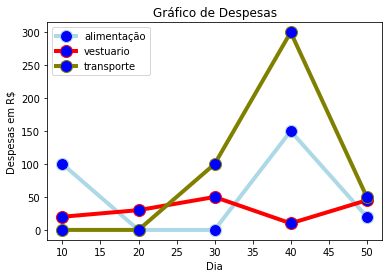

In [ ]:
w =TemporalGraph()

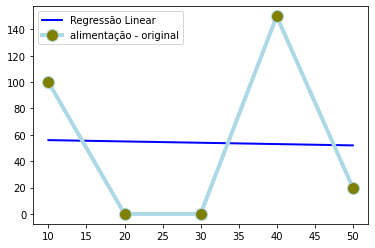

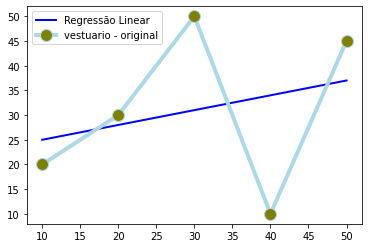

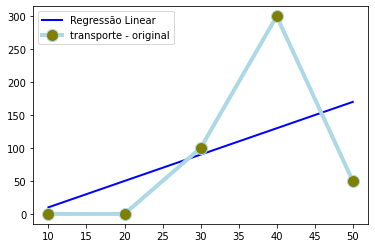

In [ ]:
x = RegressionGraph('alimentação')
y = RegressionGraph('vestuario')
z = RegressionGraph('transporte')